In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
EastWestAirlines = pd.read_excel("C:/Users/Swathi/Desktop/Excelr Classes/Assignments/6.Clustering/EastWestAirlines.xlsx")
EastWestAirlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
def norm_func(i):
    x=(i-i.min())/(i.max() - i.min())
    return(x)

Norm_EastWestAirlines = norm_func(EastWestAirlines.iloc[:,1:])
Norm_EastWestAirlines.head(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.0,0.0,0.843742,0.0
1,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.0,0.0,0.839884,0.0
2,0.024257,0.0,0.0,0.0,0.0,0.015636,0.046512,0.0,0.0,0.847842,0.0


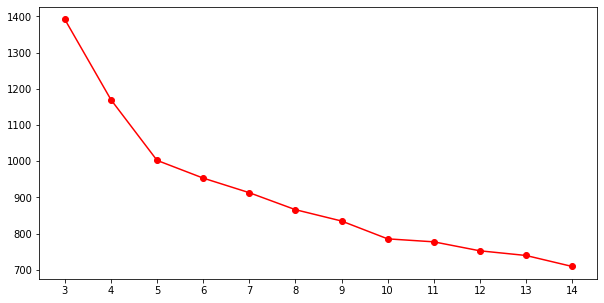

In [4]:
k = list(range(3,15))

Total_WSS=[]

for i in k:
    kmean=KMeans(n_clusters=i).fit(Norm_EastWestAirlines)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(Norm_EastWestAirlines.iloc[kmean.labels_==j,:],kmean.cluster_centers_[j].reshape(1,Norm_EastWestAirlines.shape[1]),"euclidean" )))
    Total_WSS.append(sum(WSS))
plt.figure(figsize=(10,5))
plt.plot(k,Total_WSS,'ro-') 
plt.xticks(k)
plt.show()

In [5]:
# Applying K-means clustering

Kmean_model=KMeans(n_clusters=5).fit(Norm_EastWestAirlines)
model_labels=pd.Series(Kmean_model.labels_)  # converting numpy array into pandas series object 

EastWestAirlines['cluster']=model_labels # creating a  new column and assigning it to new column 
EastWestAirlines = EastWestAirlines.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

EastWestAirlines.iloc[:,1:11].groupby(EastWestAirlines.cluster).mean()
EastWestAirlines.sort_values(by=['cluster'], inplace=True)

EastWestAirlines.head()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,1,28143,0,1,1,1,174,1,0,0,7000,0
1796,0,1813,13878,0,1,1,1,0,0,0,0,4317,0
1795,0,1812,104052,0,2,1,1,6016,12,0,0,4331,0
1793,0,1810,13033,0,1,1,1,1625,6,0,0,4334,0
809,0,819,1258,0,1,1,1,475,4,0,0,6134,0


In [6]:
EastWestAirlines.to_csv("EastWestAirlines_Kmean.csv")